In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-top-1000-movies/imdb_clean.csv
/kaggle/input/imdb-top-1000-movies/imdb_raw.csv


## Data Preparation

In [3]:
df = pd.read_csv("/kaggle/input/imdb-top-1000-movies/imdb_clean.csv")
old_df = pd.read_csv("/kaggle/input/imdb-top-1000-movies/imdb_clean.csv")
df.head(5)

,Unnamed: 0,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
2,1,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,100,134.97
3,2,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
4,2,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,84,534.86


In [4]:
## Cleaning the runtime column values.

##df["runtime"] = df["runtime"].apply(lambda x : x.replace("min",""))
##df["runtime"] = df["runtime"].astype(int)
df.head(5)

,Unnamed: 0,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
2,1,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,100,134.97
3,2,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
4,2,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,84,534.86


In [5]:
## Removing the film with zero gross profits.
## These films do not have accurate gross profit recorded.

df = df.loc[df["gross(M)"] != 0]
df.head(5)

,Unnamed: 0,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
2,1,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,100,134.97
3,2,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
4,2,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,84,534.86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 0 to 2526
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2051 non-null   int64  
 1   title         2051 non-null   object 
 2   director      2051 non-null   object 
 3   release_year  2051 non-null   int64  
 4   runtime       2051 non-null   int64  
 5   genre         2051 non-null   object 
 6   rating        2051 non-null   float64
 7   metascore     2051 non-null   int64  
 8   gross(M)      2051 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 160.2+ KB


In [7]:
## Adding a column for decade.

df["decade"] = df["release_year"].astype(str).apply(lambda x : "".join([x[0:3],"0"]))

## Reordering table for ease of use.

df = df[["title","release_year","decade","runtime","genre","rating","gross(M)"]]
df.head(5)

,title,release_year,decade,runtime,genre,rating,gross(M)
0,The Shawshank Redemption,1994,1990,142,Drama,9.3,28.34
1,The Godfather,1972,1970,175,Crime,9.2,134.97
2,The Godfather,1972,1970,175,Drama,9.2,134.97
3,The Dark Knight,2008,2000,152,Action,9.0,534.86
4,The Dark Knight,2008,2000,152,Crime,9.0,534.86


In [8]:
## Renaming the runtime column

df = df.rename(columns={
    "runtime":"runtime_min"
})

## Renaming the gross(M) column

df = df.rename(columns={
    "gross(M)":"gross_usd_mil"
})

df.head(5)

,title,release_year,decade,runtime_min,genre,rating,gross_usd_mil
0,The Shawshank Redemption,1994,1990,142,Drama,9.3,28.34
1,The Godfather,1972,1970,175,Crime,9.2,134.97
2,The Godfather,1972,1970,175,Drama,9.2,134.97
3,The Dark Knight,2008,2000,152,Action,9.0,534.86
4,The Dark Knight,2008,2000,152,Crime,9.0,534.86


In [9]:
## combining genres in single rows.


## storing all titles in the title column:
myset = set()
for x in df["title"]:
    myset.add(x)
    
## creating a new dictionary for title + genre list
newdict = {}
for x in myset:
    just_genres = df.loc[df["title"] == x]["genre"]
    genre_list = []
    for g in just_genres:
        genre_list.append(g)
    newdict[x] = genre_list
    
## Creating a new df
newdf = pd.DataFrame()

## modifying the df
for x in newdict.keys():
    genre_string = ", ".join(newdict[x])
    df.loc[df["title"]==x,"genre"] = genre_string
    
df = df.drop_duplicates()
df.head(5)

,title,release_year,decade,runtime_min,genre,rating,gross_usd_mil
0,The Shawshank Redemption,1994,1990,142,Drama,9.3,28.34
1,The Godfather,1972,1970,175,"Crime, Drama",9.2,134.97
3,The Dark Knight,2008,2000,152,"Action, Crime, Drama",9.0,534.86
6,Schindler's List,1993,1990,195,"Biography, Drama, History",9.0,96.90
9,12 Angry Men,1957,1950,96,"Crime, Drama",9.0,4.36


In [10]:
## Sorting the data frame from newest to oldest.

df = df.sort_values(by="release_year",ascending=False)
df.head(5)

,title,release_year,decade,runtime_min,genre,rating,gross_usd_mil
2328,Avatar: The Way of Water,2022,2020,192,"Action, Adventure, Fantasy",7.6,659.68
1506,The Batman,2022,2020,176,"Action, Crime, Drama",7.8,369.35
1509,Everything Everywhere All at Once,2022,2020,139,"Action, Adventure, Comedy",7.8,72.86
1182,Puss in Boots: The Last Wish,2022,2020,102,"Animation, Adventure, Comedy",7.9,168.46
1550,RRR,2022,2020,187,"Action, Drama",7.8,14.50


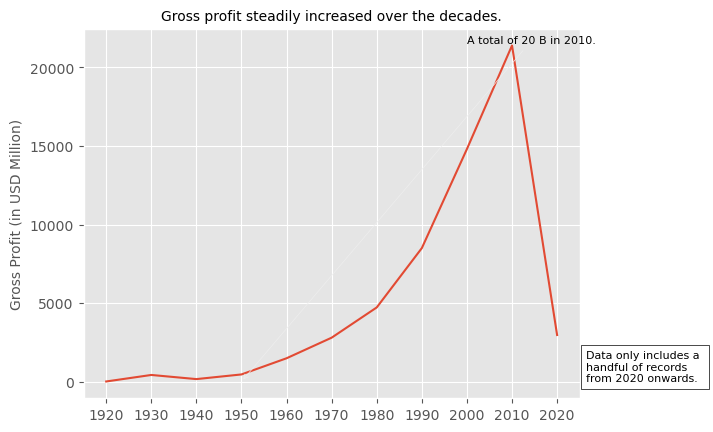

In [11]:
## Analyzing total gross profit per decade.

plt.style.use("ggplot")

data = df.groupby("decade").agg("sum", numeric_only=True)["gross_usd_mil"].to_frame().reset_index()
data_x = data["decade"]
data_y = data["gross_usd_mil"]

## plotting using a line chart.

fig, ax = plt.subplots()

ax.plot(data_x, data_y)
ax.set_ylabel("Gross Profit (in USD Million)",fontsize=10)
ax.set_title("Gross profit steadily increased over the decades.",fontsize=10)

ax.annotate('A total of 20 B in 2010.', xy=(3, 9), xytext=(8, 21_500),fontsize=8,
             arrowprops=dict(arrowstyle='->'))

ax.text(10.65,0,"Data only includes a \nhandful of records \nfrom 2020 onwards.",
        fontsize=8,bbox={"facecolor":"white","edgecolor":"black"})

plt.show()

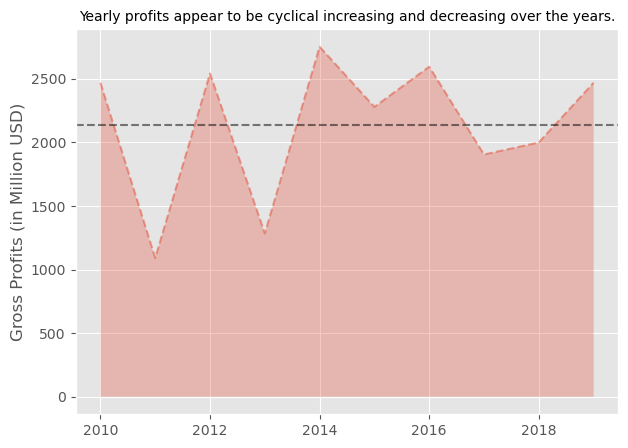

In [12]:
## Plotting gross profits earned per year in the 2010s.

data = df.loc[df["decade"] == "2010"]
data = data.groupby("release_year").agg("sum",numeric_only = True)["gross_usd_mil"].to_frame().reset_index()
data_x = data["release_year"]
data_y = data["gross_usd_mil"]

## plotting the yearly profits

fig, ax = plt.subplots(figsize=(7,5))
ax.fill_between(data_x,data_y,alpha=0.3)
ax.plot(data_x,data_y,alpha=0.5,ls="--")

ax.set_ylabel("Gross Profits (in Million USD)")
ax.set_title("Yearly profits appear to be cyclical increasing and decreasing over the years.",fontsize=10)
ax.axhline(data["gross_usd_mil"].mean(),ls="--",alpha=0.5,color="black")

plt.show()


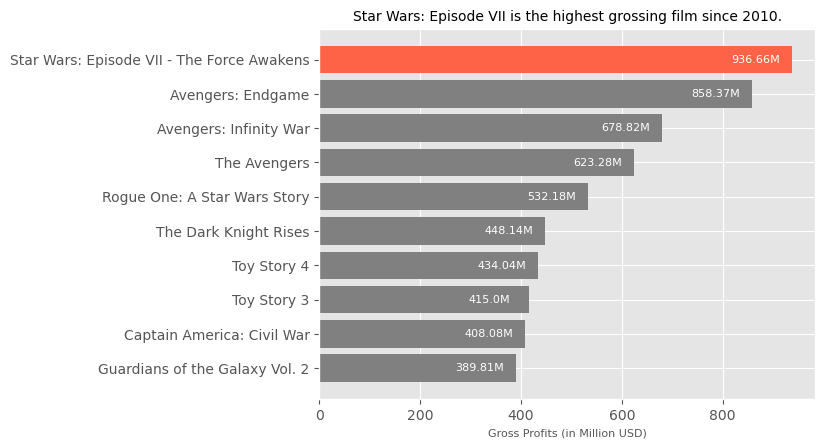

In [13]:
## Plotting the 10 highest grossing film in the last 20 years?

data = df.loc[(df["release_year"] >= 2010) & (df["release_year"] <= 2020)][["title","release_year","gross_usd_mil"]]
data = data.sort_values("gross_usd_mil",ascending=False).head(10)
data = data.sort_values("gross_usd_mil",ascending=True)
data_x = data["title"]
data_y = data["gross_usd_mil"]
data_z = data["release_year"]

fig,ax = plt.subplots()

maxval = data_y.max()

ax.barh(data_x,data_y,color=["tomato" if value == maxval else "gray" for value in data_y])

for i,v in enumerate(data_y):
    ax.text(v-120,i,f'{v}M',fontsize=8,color="white",va="center")
    
ax.set_title("Star Wars: Episode VII is the highest grossing film since 2010.",
            fontsize=10)
ax.set_xlabel("Gross Profits (in Million USD)", fontsize=8)

plt.show()

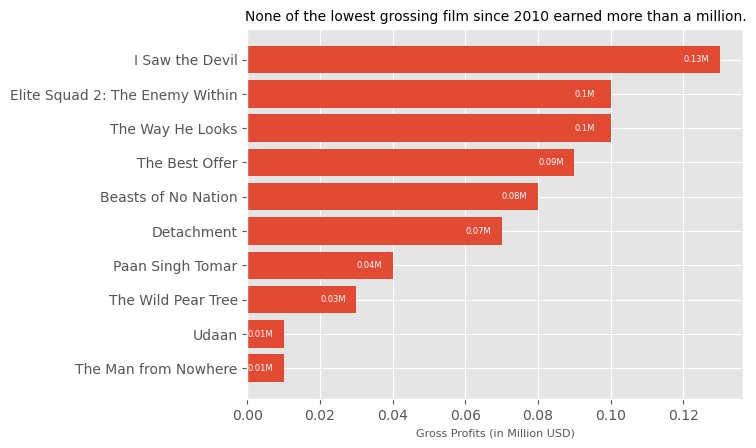

In [14]:
## Plotting the lowest grossing film in the past decades.

fig, ax = plt.subplots()

data = df.loc[(df["release_year"] >= 2010) & (df["release_year"] <= 2020)][["title","release_year","gross_usd_mil"]]
data = data.sort_values("gross_usd_mil",ascending=True).head(10)
data = data.sort_values("gross_usd_mil",ascending=True)
data_x = data["title"]
data_y = data["gross_usd_mil"]

ax.barh(data_x,data_y)

for i,v in enumerate(data_y):
    ax.text(v-0.01,i,f'{v}M',fontsize=6,color="white",va="center")
    
ax.set_title("None of the lowest grossing film since 2010 earned more than a million.",fontsize=10)
ax.set_xlabel("Gross Profits (in Million USD)", fontsize=8)
plt.show()

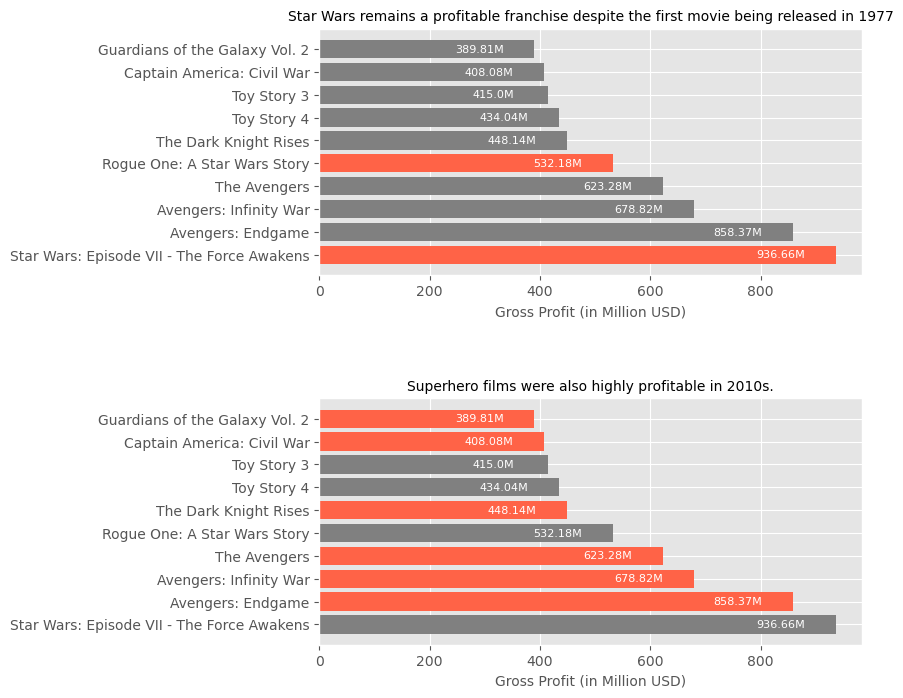

In [15]:
## Highest grossing film in 2010s.

data = df.loc[df["decade"] == "2010"].sort_values(by="gross_usd_mil",ascending=False).head(10)
data = data[["title","genre","gross_usd_mil"]]
data_x = data["title"]
data_y = data["gross_usd_mil"]

fig,(ax,ax1) = plt.subplots(2,1,figsize=(7,8))

starwars_list = ["Star Wars: Episode VII - The Force Awakens","Rogue One: A Star Wars Story"]

ax.barh(data_x, data_y,color=["tomato" if title in starwars_list else "gray" for title in data_x])

for i,v in enumerate(data_y):
    ax.text(v-100,i,str(v)+"M",fontsize=8,ha="center",color="white",va="center")
ax.set_xlabel("Gross Profit (in Million USD)",fontsize=10)

ax.set_title("Star Wars remains a profitable franchise despite the first movie being released in 1977",fontsize=10)


## Coloring the superhero movies.

data = df.loc[df["decade"] == "2010"].sort_values(by="gross_usd_mil",ascending=False).head(10)
data = data[["title","genre","gross_usd_mil"]]
data_x = data["title"]
data_y = data["gross_usd_mil"]

super_list = ["Avengers: Endgame","Avengers: Infinity War","The Avengers","The Dark Knight Rises","Captain America: Civil War","Guardians of the Galaxy Vol. 2"]

maxval = data_y.max()

ax1.barh(data_x, data_y,color=["tomato" if title in super_list else "gray" for title in data_x])

for i,v in enumerate(data_y):
    ax1.text(v-100,i,str(v)+"M",fontsize=8,ha="center",color="white",va="center")
ax1.set_xlabel("Gross Profit (in Million USD)",fontsize=10)

ax1.set_title("Superhero films were also highly profitable in 2010s.",fontsize=10)

fig.subplots_adjust(hspace=0.5)

plt.show()


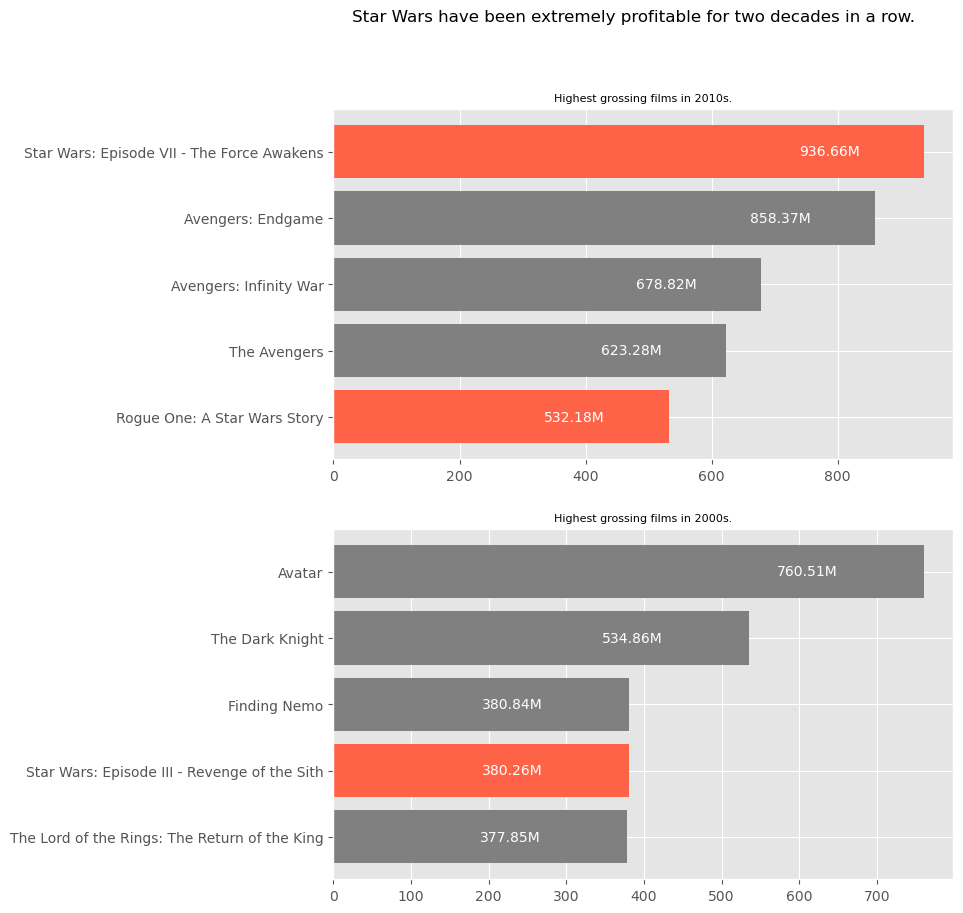

In [16]:
## Comparing the top highest grossing films of 2010s and 2000s. 

##2010s

data = df.loc[df["decade"] == "2010"]
data = data.sort_values(by="gross_usd_mil",ascending=False).head(5)
data = data.sort_values(by="gross_usd_mil",ascending=True)
data_x = data["title"]
data_y = data["gross_usd_mil"]

fig,(ax,ax1) = plt.subplots(2,1,figsize=(8,10))

for i,v in enumerate(data_y):
    ax.text(v-150,i,str(v)+"M",fontsize=10,ha="center",color="white",va="center")

ax.barh(data_x,data_y,color=["tomato" if "Star Wars" in title else "gray" for title in data_x])
ax.set_title("Highest grossing films in 2010s.",fontsize=8)


## 2000s.

data = df.loc[df["decade"] == "2000"]
data = data.sort_values(by="gross_usd_mil",ascending=False).head(5)
data = data.sort_values(by="gross_usd_mil",ascending=True)
data_x = data["title"]
data_y = data["gross_usd_mil"]

for i,v in enumerate(data_y):
    ax1.text(v-150,i,str(v)+"M",fontsize=10,ha="center",color="white",va="center")

ax1.barh(data_x,data_y,color=["tomato" if "Star Wars" in title else "gray" for title in data_x])
ax1.set_title("Highest grossing films in 2000s.",fontsize=8)


fig.subplots_adjust(wspace=1.1)
fig.suptitle("Star Wars have been extremely profitable for two decades in a row.",fontsize=12)
plt.show()

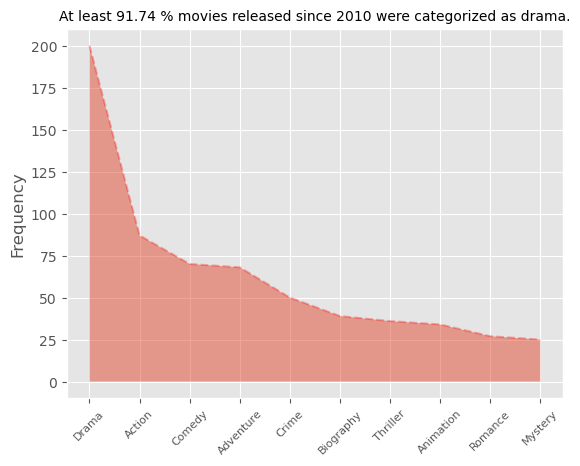

In [17]:
## Plotting the most common genres since 2010s

data = old_df.loc[old_df["release_year"] >= 2010]
data = data.groupby("genre").agg("count")["title"].to_frame().reset_index()
data = data.rename(columns={"title":"count"})
data = data.sort_values(by="count",ascending=False).head(10)

data_x = data["genre"]
data_y = data["count"]

fig, ax = plt.subplots()

ax.fill_between(data_x,data_y,alpha=0.5)
ax.plot(data_x,data_y,alpha=0.3,color="red",ls="--")

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_fontsize(8)

ax.set_ylabel("Frequency")

drama_pro = (200/len(df.loc[df["release_year"] >= 2010]))*100
drama_pro = round(drama_pro,2)
drama_pro = str(drama_pro) + " %"

ax.set_title(f'At least {drama_pro} movies released since 2010 were categorized as drama.',fontsize=10)

plt.show()

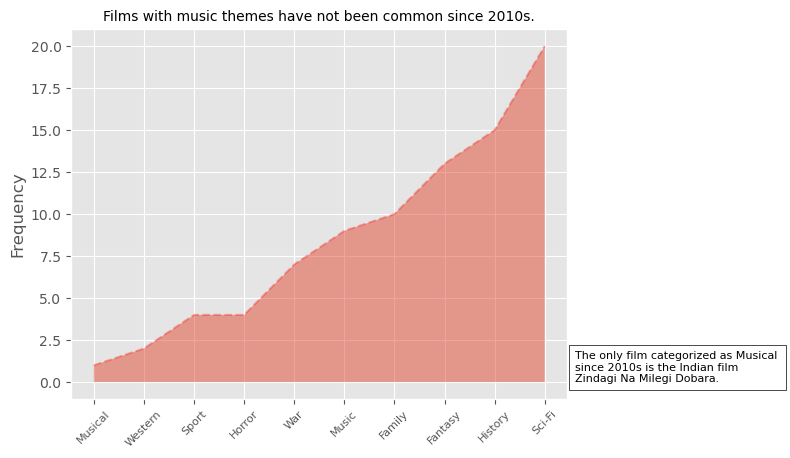

In [18]:
## Plotting the least common genres since 2010s.

data = old_df.loc[old_df["release_year"] >= 2010]
data = data.groupby("genre").agg("count")["title"].to_frame().reset_index()
data = data.rename(columns={"title":"count"})
data = data.sort_values(by="count",ascending=True).head(10)

data_x = data["genre"]
data_y = data["count"]

fig, ax = plt.subplots()

ax.fill_between(data_x,data_y,alpha=0.5)
ax.plot(data_x,data_y,alpha=0.3,color="red",ls="--")

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_fontsize(8)

ax.set_ylabel("Frequency")

ax.text(9.6,0,"The only film categorized as Musical \nsince 2010s is the Indian film \nZindagi Na Milegi Dobara.",
        fontsize=8,
        bbox={"facecolor":"white","edgecolor":"black"})

ax.set_title("Films with music themes have not been common since 2010s.",fontsize=10)

plt.show()

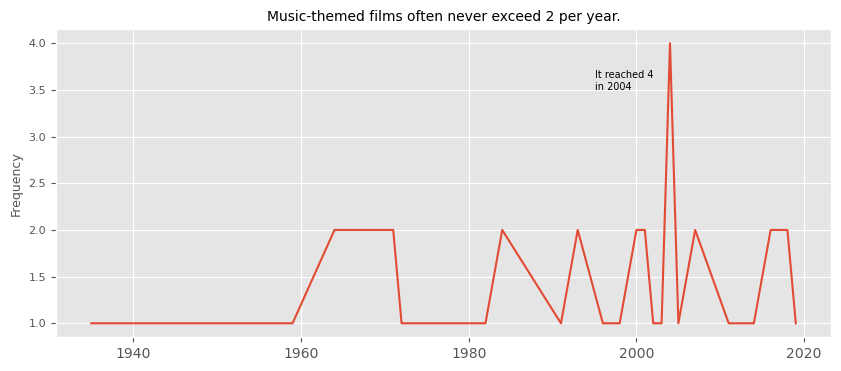

In [57]:
## Exploring the trends with musical films.

data = df.loc[(df["genre"].str.contains("Musical")) | (df["genre"].str.contains("Music"))]
data = data.groupby("release_year").agg("count")["title"].to_frame().reset_index()

fig, ax  =plt.subplots(figsize=(10,4))

data_x = data["release_year"]
data_y = data["title"]

for tick in ax.get_yticklabels():
    tick.set_fontsize(8)

ax.plot(data_x, data_y)

ax.set_ylabel("Frequency",fontsize=9)
ax.set_title("Music-themed films often never exceed 2 per year.",fontsize=10)

##ax.text(2000,3.5,"I am here")
ax.annotate("There were 4 \nin 2004.",xy=(1995,3.5),xytext=(1995,3.5),arrowprops={"arrowstyle":"->"},fontsize=7)

plt.show()

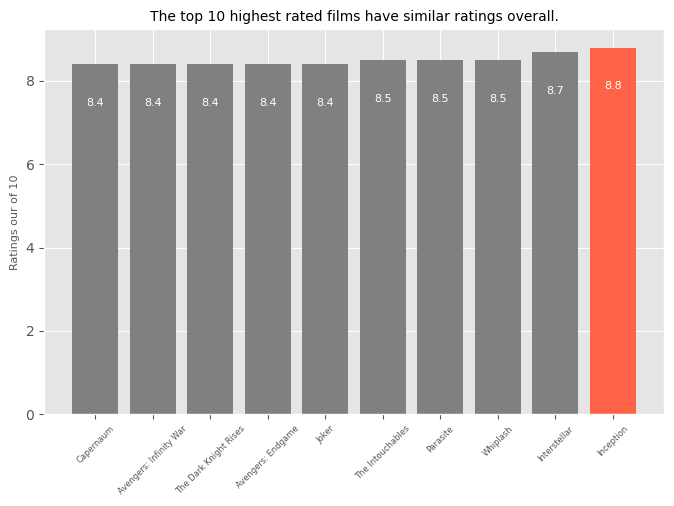

In [73]:
## Plotting the highest rated films since 2010

data = df.loc[df["release_year"] >= 2010]
data = data.sort_values("rating",ascending=False)
data = data.head(10)
data = data.sort_values("rating",ascending=True)
data_x = data["title"]
data_y = data["rating"]
fig, ax = plt.subplots(figsize=(8,5))

maxval = data_y.max()

ax.bar(data_x,data_y,color=["tomato" if value == maxval else "gray" for value in data_y])

for tick in ax.get_xticklabels():
    tick.set_fontsize(6)
    tick.set_rotation(45)
    
for i,v in enumerate(data_y):
    ax.text(i,v-1,v,fontsize=8,ha="center",color="white")
    
ax.set_ylabel("Ratings our of 10",fontsize=8)

ax.set_title("The top 10 highest rated films have similar ratings overall.",fontsize=10)

plt.show()

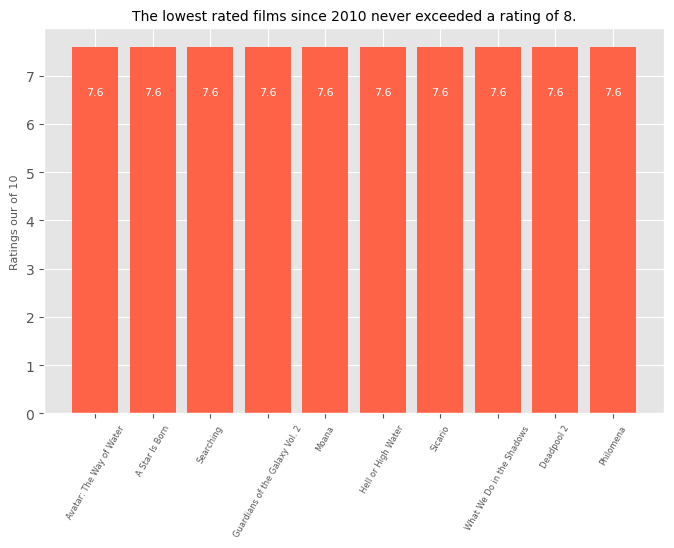

In [78]:
## Plotting the lowest rated films since 2010

data = df.loc[df["release_year"] >= 2010]
data = data.sort_values("rating",ascending=True)
data = data.head(10)
data_x = data["title"]
data_y = data["rating"]
fig, ax = plt.subplots(figsize=(8,5))

maxval = data_y.max()

ax.bar(data_x,data_y,color=["tomato" if value == maxval else "gray" for value in data_y])

for tick in ax.get_xticklabels():
    tick.set_fontsize(6)
    tick.set_rotation(60)
    
for i,v in enumerate(data_y):
    ax.text(i,v-1,v,fontsize=8,ha="center",color="white")
    
ax.set_ylabel("Ratings our of 10",fontsize=8)

ax.set_title("The lowest rated films since 2010 never exceeded a rating of 8.",fontsize=10)

plt.show()

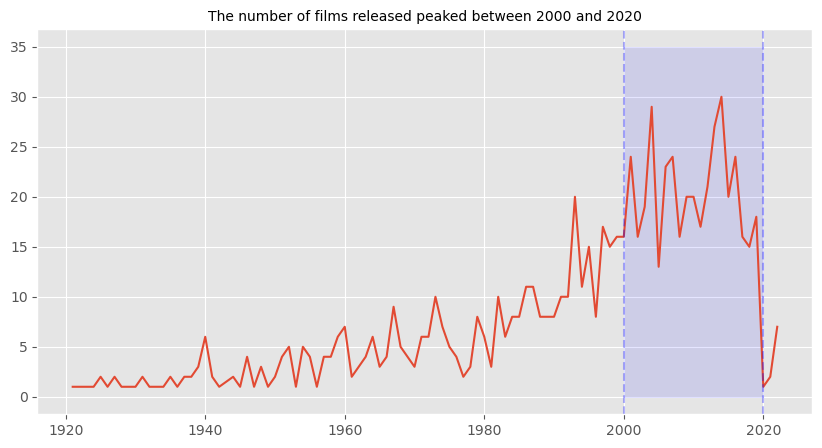

In [101]:
## Plotting the number of films released per year.

data = df.groupby("release_year").agg("count")["title"]
data = data.to_frame().reset_index()
data_x = data["release_year"]
data_y = data["title"]

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(data_x,data_y)

ax.axvline(2000,alpha=0.3,ls="--",color="blue")
ax.axvline(2020,alpha=0.3,ls="--",color="blue")
ax.fill_between(np.arange(2000,2021),0,35,alpha=0.1,color="blue")

ax.set_title("The number of films released peaked between 2000 and 2020",fontsize=10)

plt.show()